In [25]:
!pip install sshtunnel

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 210 kB 2.9 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3.8 -m pip install --upgrade pip' command.


In [42]:
from pymongo import MongoClient
import matplotlib.pyplot as plt
import os
from sshtunnel import SSHTunnelForwarder
import numpy as np
import pandas as pd

In [2]:
MONGO_HOST = "193.196.55.231"
MONGO_DB = "twitter_db"

server = SSHTunnelForwarder(
    MONGO_HOST,
    ssh_username="ubuntu",
    ssh_pkey="/home/tobias/.ssh/ghost_id_rsa",
    remote_bind_address=('127.0.0.1', 27017)
)

server.start()

client = MongoClient('127.0.0.1', server.local_bind_port) # server.local_bind_port is assigned local port
db = client[MONGO_DB]


In [118]:
cleaned_metric = []
public_metrics = db.cc_users.find({}, {"public_metrics.followers_count": 1, "public_metrics.following_count": 1, "public_metrics.tweet_count": 1, "id": 1, "username": 1, "verified" : 1})
for metric in public_metrics:
    if "public_metrics" in metric:
        cleaned_metric.append([metric["id"], metric["username"], metric["public_metrics"]["followers_count"], metric["public_metrics"]["following_count"], metric["public_metrics"]["tweet_count"], metric["verified"]])
df = pd.DataFrame(list(cleaned_metric))
df = df.rename(columns={0: "id", 1: "username", 2: "followers_count", 3: "following_count", 4: "tweet_count", 5: "verified"})

In [119]:
df

,id,username,followers_count,following_count,tweet_count,verified
0,46671731,ginacarano,985121,1026,4455,True
1,1239941259571101697,ZoeNichols155,47,85,4470,False
2,2701583718,michaelolds0,4,30,15,False
3,868993857433858048,Melissa72272061,184,228,29727,False
4,1377392363249672194,BorgesJoey,4,13,343,False
...,...,...,...,...,...,...
134899,36588590,msvespa,38257,42072,46693,False
134900,1200667488448655360,ALittIeLife_,312,299,8288,False
134901,842402820783525890,BradleyMcGuinn2,74,321,229,False
134902,1029478585499897858,MadeByKuba,28,111,81,False


In [120]:
df.describe()

,followers_count,following_count,tweet_count
count,1.349040e+05,134904.000000,1.349040e+05
mean,2.053235e+03,906.081843,2.130139e+04
std,6.777062e+04,2728.993796,4.511145e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,5.600000e+01,179.000000,1.666000e+03
50%,2.160000e+02,445.000000,7.043000e+03
75%,7.350000e+02,990.000000,2.235025e+04
max,1.936286e+07,591783.000000,2.866433e+06


In [80]:
df.dtypes

id                 object
username           object
followers_count     int64
following_count     int64
tweet_count         int64
dtype: object

In [154]:
lol = df.loc[df['verified'] == True].sort_values(by=['followers_count'])

In [156]:
lol

,id,username,followers_count,following_count,tweet_count,verified
125883,40171480,jocelynchels,437,877,8444,True
49349,1038970321,thisisamsi,573,612,9063,True
47473,15704888,KingImpulse,583,260,72143,True
123256,467838840,kerubright,599,1210,10522,True
124007,593972983,emilychudy,658,582,3999,True
24420,168922895,iamtaylorjade,660,653,8607,True
45914,131923847,iamdylanhaas,709,590,4839,True
38370,52771152,raisedinthecity,715,1077,23577,True
119466,2179027880,sam_cleal,737,1141,3282,True
48157,18374144,simashakeri,745,390,9137,True


<BarContainer object of 10 artists>

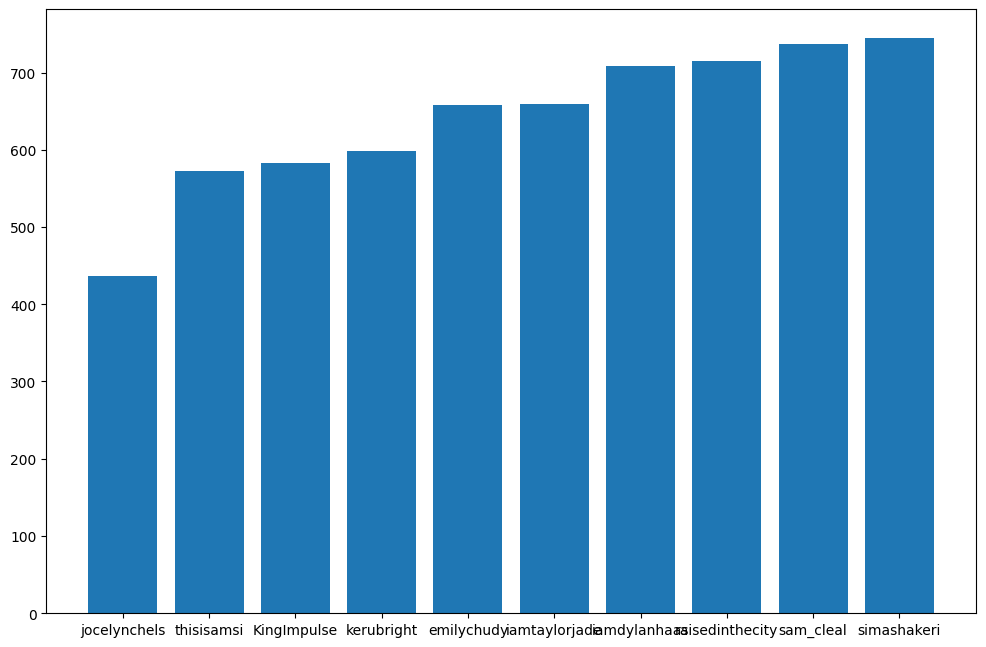

In [153]:
plt.figure(figsize=(12, 8), dpi=100)
plt.bar(lol.username, lol.followers_count)

<AxesSubplot:xlabel='followers_count', ylabel='tweet_count'>

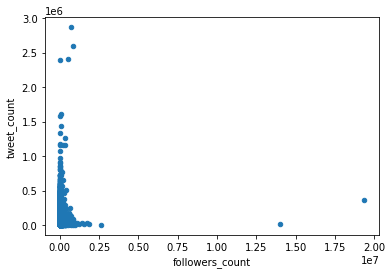

In [83]:
df.plot.scatter(x="followers_count", y="tweet_count")

In [113]:
df.loc[df['tweet_count'].idxmax()]

id                 997774805511360512
username                     this_vid
followers_count                723298
following_count                     0
tweet_count                   2866433
Name: 94295, dtype: object